In [1]:
# import os

# os.environ['KAGGLE_USERNAME'] = 'tusharbauskar0812'
# os.environ['KAGGLE_KEY'] = '80a9cbf2ffcd660dc7ae44c18d3796b2'

In [2]:
# !pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=b26deff5da7ecf3de5f884cce31576cc81ab4100bb95e8a6fd1c48eef8f65edc
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [3]:
# !kaggle datasets download -d bertcarremans/glovetwitter27b100dtxt

 93% 369M/397M [00:03<00:00, 109MB/s]
100% 397M/397M [00:03<00:00, 130MB/s]


In [4]:
# !unzip "/content/drive/MyDrive/Dataset/glovetwitter27b100dtxt.zip" -d "/content/drive/MyDrive/Dataset/glove-twitter"

Archive:  /content/drive/MyDrive/Dataset/glovetwitter27b100dtxt.zip
  inflating: /content/drive/MyDrive/Dataset/glove-twitter/glove.twitter.27B.100d.txt  


In [8]:
# Checking GloVe

with open('/content/drive/MyDrive/Dataset/glove-twitter/glove.twitter.27B.100d.txt',
          'r', encoding='utf-8') as f:
          for line in f:
              print(line)
              break

<user> 0.63006 0.65177 0.25545 0.018593 0.043094 0.047194 0.23218 0.11613 0.17371 0.40487 0.022524 -0.076731 -2.2911 0.094127 0.43293 0.041801 0.063175 -0.64486 -0.43657 0.024114 -0.082989 0.21686 -0.13462 -0.22336 0.39436 -2.1724 -0.39544 0.16536 0.39438 -0.35182 -0.14996 0.10502 -0.45937 0.27729 0.8924 -0.042313 -0.009345 0.55017 0.095521 0.070504 -1.1781 0.013723 0.17742 0.74142 0.17716 0.038468 -0.31684 0.08941 0.20557 -0.34328 -0.64303 -0.878 -0.16293 -0.055925 0.33898 0.60664 -0.2774 0.33626 0.21603 -0.11051 0.0058673 -0.64757 -0.068222 -0.77414 0.13911 -0.15851 -0.61885 -0.10192 -0.47 0.19787 0.42175 -0.18458 0.080581 -0.22545 -0.065129 -0.15328 0.087726 -0.18817 -0.08371 0.21779 0.97899 0.1092 0.022705 -0.078234 0.15595 0.083105 -0.6824 0.57469 -0.19942 0.50566 -0.18277 0.37721 -0.12514 -0.42821 -0.81075 -0.39326 -0.17386 0.55096 0.64706 -0.6093



In [9]:
import numpy as np

embedding_dict = {}

with open('/content/drive/MyDrive/Dataset/glove-twitter/glove.twitter.27B.100d.txt',
          'r', encoding='utf-8') as f:
          for line in f:
              values = line.split()
              word = values[0]
              vector = np.asarray(values[1:], 'float32')
              embedding_dict[word] = vector

In [ ]:
# embedding_dict

In [13]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Cryptofuture/traindata.csv', encoding='latin')
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

df.sample(n=10)

,target,ids,date,flag,user,text
745082,0,2282160699,Mon Jun 22 11:01:04 PDT 2009,NO_QUERY,jamescronin,@beas_bloomsbury thanks Bea. Mine tried to eat...
1523888,4,2176643441,Mon Jun 15 04:24:15 PDT 2009,NO_QUERY,ashley_elayne,Safety Town with Kyle &amp; Aden Woop
548162,0,2202291426,Tue Jun 16 21:32:58 PDT 2009,NO_QUERY,rondata,@cjdmusic scary
1305397,4,2011164062,Tue Jun 02 18:35:02 PDT 2009,NO_QUERY,AATP,@beauty411 - I would say deep grass trenches ...
1373464,4,2051330073,Fri Jun 05 21:40:50 PDT 2009,NO_QUERY,ERINisBEASTLY,@adambarber YES! OF COURSE! You guys should ha...
637522,0,2234212392,Thu Jun 18 22:37:57 PDT 2009,NO_QUERY,meldawgz,trying to convince chris parker to go to the f...
744582,0,2267178863,Sun Jun 21 09:45:13 PDT 2009,NO_QUERY,Pauleisha,Happy father's day dad rest in peace.
504489,0,2188140098,Mon Jun 15 21:22:11 PDT 2009,NO_QUERY,TiffanyDow,Prayers for pro golfers Phil Mickelson (wife ...
1355451,4,2047479756,Fri Jun 05 13:42:51 PDT 2009,NO_QUERY,jeremiahg,@ebellis FoSho. SilverTail is one company to w...
579344,0,2213450081,Wed Jun 17 15:23:23 PDT 2009,NO_QUERY,chachi_guerrero,I just noticed I lost the sunglasses I was wea...


In [17]:
# Creating a smaller dataset

negative_tweets_df = df[0:799999]
negative_tweets_df.tail(n=10)

,target,ids,date,flag,user,text
799989,0,2329204651,Thu Jun 25 10:28:26 PDT 2009,NO_QUERY,Badmantalking,"and I think it has a mind of its own,like it a..."
799990,0,2329204705,Thu Jun 25 10:28:27 PDT 2009,NO_QUERY,loveisnothing,@iaintnohomo Banana will be playing later. BU...
799991,0,2329204790,Thu Jun 25 10:28:27 PDT 2009,NO_QUERY,CJROSE218,@koolgirl37 read my tweet below
799992,0,2329204835,Thu Jun 25 10:28:27 PDT 2009,NO_QUERY,mattfca,My life http://mattf.ca/2009/06/24/yay-me/
799993,0,2329204987,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,360cookie,Tried to get the mutant Fawkes to follow me bu...
799994,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799995,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799996,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799997,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...
799998,0,2329205794,Thu Jun 25 10:28:31 PDT 2009,NO_QUERY,tpchandler,has to resit exams over summer... wishes he w...


In [18]:
positive_tweets_df = df[799999:]
positive_tweets_df.sample(n=10)

,target,ids,date,flag,user,text
902201,4,1694382676,Mon May 04 02:22:26 PDT 2009,NO_QUERY,tdes,@chishiki Welcome back to Japan
1554982,4,2185014002,Mon Jun 15 16:45:21 PDT 2009,NO_QUERY,irachelrenee,@ilovelu I like the last one
969821,4,1827980455,Sun May 17 11:50:45 PDT 2009,NO_QUERY,Rlggx3,sooo confused! kerry help me. ahah.
994089,4,1835499545,Mon May 18 06:07:55 PDT 2009,NO_QUERY,stuartmeek,Windies all out for 176 in their 2nd innings. ...
1222436,4,1990291520,Mon Jun 01 04:27:29 PDT 2009,NO_QUERY,antekos,listening never shout never
1348324,4,2044846327,Fri Jun 05 09:53:56 PDT 2009,NO_QUERY,nischalshetty,@apnerve comments are better that way since ot...
1441345,4,2061805125,Sat Jun 06 21:39:19 PDT 2009,NO_QUERY,KingCocoaWyatt,"Must admit, that stud in the picture is not me..."
992064,4,1835195580,Mon May 18 05:23:44 PDT 2009,NO_QUERY,ShesElectric_,"Hey darlings, how is everyone today?! I'm just..."
913725,4,1752697836,Sat May 09 22:41:24 PDT 2009,NO_QUERY,crrystalbabe,@vivianchiu LOL. You should buy your mummy flo...
1094194,4,1970126290,Sat May 30 02:33:38 PDT 2009,NO_QUERY,twittcrumpet,@shedfire break out the anecdotes. laughter wins


In [20]:
subset = pd.concat([negative_tweets_df.sample(n=55000), positive_tweets_df.sample(n=55000)])

In [21]:
subset.sample(n=10)

,target,ids,date,flag,user,text
439249,0,2066390397,Sun Jun 07 10:25:49 PDT 2009,NO_QUERY,TheBennyZone,@Sheindie its saying it doesnt exist
47511,0,1677652140,Sat May 02 03:14:41 PDT 2009,NO_QUERY,karthikram2001,Got cold....and A long week ahead...working th...
61280,0,1686674705,Sun May 03 06:21:58 PDT 2009,NO_QUERY,KatHumble,"@FeminaPrudentia Oh lord, not much I'm afraid...."
652254,0,2238155734,Fri Jun 19 06:54:01 PDT 2009,NO_QUERY,maddie5218,@LizJonasHQ yeah haha thank god it's only 34 ...
534758,0,2197677316,Tue Jun 16 14:58:58 PDT 2009,NO_QUERY,chocoholic_95,doing science home work. baking cake for home ...
1229976,4,1991476205,Mon Jun 01 07:06:28 PDT 2009,NO_QUERY,XanthRiaheart,Getting ready for a day of work at both jobs s...
1534294,4,2178739055,Mon Jun 15 08:08:12 PDT 2009,NO_QUERY,EggyMayers,@JohnnyToffee NO! Hmf. On my way home still fr...
1183456,4,1982431947,Sun May 31 11:11:45 PDT 2009,NO_QUERY,RollinsWallace,@patriotfreedom LOL ... no joke. I encourage ...
970122,4,1828006311,Sun May 17 11:53:55 PDT 2009,NO_QUERY,DubarryMcfly,@JessMcflyxxx hey im good thanks chicken love...
1010227,4,1880982094,Fri May 22 03:11:14 PDT 2009,NO_QUERY,MetaKongDetroit,wildwindart @grader @seandeardorff @QueenRania...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


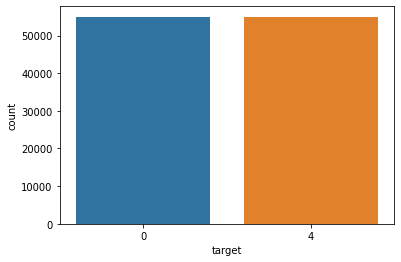

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(subset.target)

In [23]:
subset.to_csv('/content/drive/MyDrive/Cryptofuture/small_data.csv', encoding='utf-8')